
<center> <h2><span style="color:blue">Seleccion de caracteristicas</span></h2> </center>

El tamaño es un de las primeras cosas que hay que mirar.

Dependiendo del dataset es necesario hacer un preporcesamiento de los datos.

En datasets grandes hay muchos atributos que producen **ruido** (no aportan ningun valor a la prediccion de la variable)

<span style="color:green">**Ventajas**</span>.


- Utilizamos menos caracteristicas para construir el modelo entonces facilitamos su interpretacion

- Menores recursos computacionales porque reducimos el tamaño


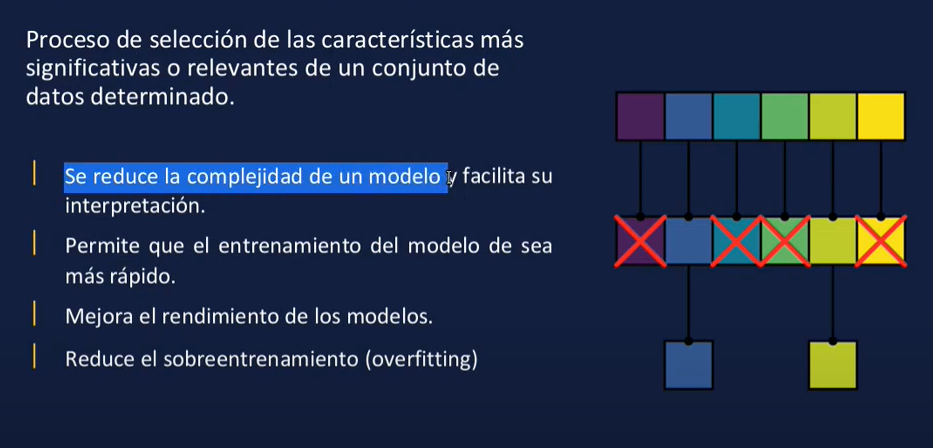

In [14]:
from IPython.display import Image
Image(filename='img/1.PNG')

Existen varios metodos para hacer la seleccion de caracteristicas.


<h2><span style="color:Red">1. Filter</span></h2>


<span style="color:red">Hay que tener en cuenta la varaiable con la que estemos trabajando a la hora de escojer trabajar con **filter**</span>.

Usualmente se aplica la variable de **Pearson**

Pero si una de las variables es **categorica** es **IMPOSIBLE** aplicar **Pearson**

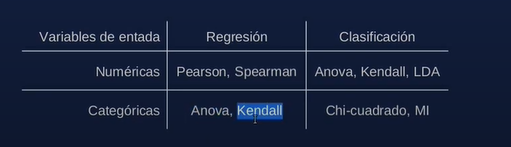

In [15]:
from IPython.display import Image
Image(filename='img/2.PNG')

Lo que se va a hacer es comparar las variables de **entrada** con las variables de **salida** para ver cuales estan más correlacionadas y eliminar el resto

Para esto hay un algoritmo en **Scaler** 

<span style="color:red">**SelectKBest**</span>.

TEnemos que hacer un estudio de estadistica descriptiva para ver la **correlacion** entre variables.

Queremos eleiminar las variables que estén fuertemente correladas entre sí y **NO** con la variable de salida

Esto tambén se vio en la clase 2

In [25]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # ANOVA


In [26]:
df = pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Ahora relleno los datos faltantes

In [27]:
df.fillna(0, inplace=True)

In [70]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Tomo todos los datos excepto la ultima columna <span style="color:red">**INPUT**</span>

In [38]:
input_data = df[df.columns[:-1]]


Convierto la **Y** en un dataframa <span style="color:red">**OUTPUT**</span>

In [40]:
Y = df[df.columns[-1]]

Usualmente la selecciona de datos se aplica al conjunto de **entrenamiento** y depues sobre el conjunto de **test**

Aqui no se ha separado test y training entonces por eso utilizo  <span style="color:blue">**get_dummmies**</span>

Pero **NO** es el procedimiento estricto que hay que seguir.

In [31]:
input_data = pd.get_dummies(input_data, prefix=['gen'])

Ahora instancio un obejto de la clase <span style="color:red">**SelectKBest**</span>

Dentro tiene un parametro <span style="color:blue">**score_func**</span>

Esto nos ayuda a identificar que metodo de corelacion queremos utilizar

Dentro de <span style="color:red">**Scaler**</span>

<span style="color:blue">**f_classif**</span> es igual a <span style="color:red">**ANOVA**</span> porque aqui estoy con un probelema de clasificacion con variables numericas

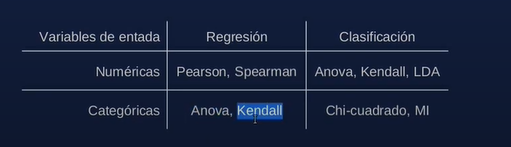

In [41]:
from IPython.display import Image
Image(filename='img/2.PNG')

<span style="color:blue">**k = 5**</span> es el numero maximo de variable que tendré tras el proceso de seleccion

En este caso le digo que me quiero quedar con las mejores 5 variables

Dentro de <span style="color:blue">**Aquellas que esten mas correladas entre ellas** </span> y la variable de  **salida**

In [32]:
filterKB = SelectKBest(score_func = f_classif, k = 5)

Aqui entrenamos al objeto a traves de l metodo **fit**

In [33]:
filter_model = filterKB.fit(input_data, Y)

Una vez que termina el objeto <span style="color:blue">**SelectKBest**</span> queda configurado de tal modo que tiene un atributo que me dice cuanta es la correalacion entre las variables de entrada con las de la salida

Entonces viendo eso ya puedo saber si **5** es un buen valor o tengo que acomodarlo más


Aqui la variables con mayor correlacion son aquellas que tienen un **número mayor**.

In [34]:
print(filter_model.scores_)

[11.1714293  29.60928154 37.43959214 20.55843531 15.94121994 13.72863496
  0.71293374 15.53743097 13.05895745  3.97336307  3.97336307]


Entonces **transform** lo unico que hace el metodo transform es tomar los valores una vez convertidos y quedarse con los 5 mejor.

Eso es todo lo que hace.  Identifica aquellas que tengan mas correlacion y te genera un Pandas dataframe

In [35]:
selected = filter_model.transform(input_data)

Ahora vemos un dataframe con la corelacion existente entrelas doferntes variables y la variable de salida.



In [36]:
print(pd.DataFrame(selected).head())

      0    1      2     3    4
0   0.7  0.1  187.0  16.0  3.3
1  10.9  5.5  699.0  64.0  3.2
2   7.3  4.1  490.0  60.0  3.3
3   1.0  0.4  182.0  14.0  3.4
4   3.9  2.0  195.0  27.0  2.4


<h2><span style="color:Red">2. Wrapper</span></h2>

Son completamente disitintos a los filter

Aqui si hay un algoritmo de machine learning

Aqui se acoplo un algoritmo de machine learning con el procesamiento de la seleccion de caracteristicas


<span style="color:blue"> Aqui creo un subconjunto y despues aplico el algoritmo de machine learning. </span>.

El rendimiento del algoritmo me dirá si el subconjunto es bueno o malo

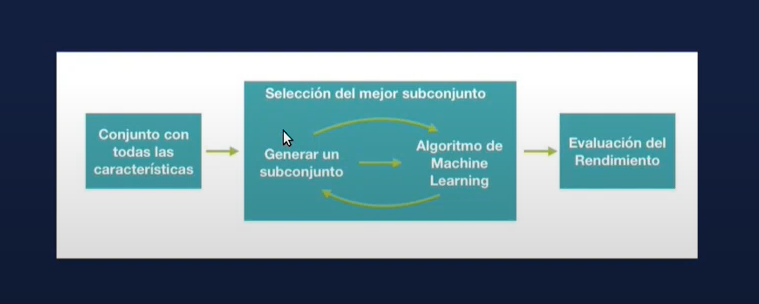

In [43]:
from IPython.display import Image
Image(filename='img/3.PNG')

<h4><span style="color:blue">RFE - REcursive Feature Elimination</span></h4>

Lo que hace es que va guardando variables de manera recursiva

Identifica cuales variables de entrada tienen mayor correlacion con la variable de salida. Es decir, cuales variables tienen más peso

In [55]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

In [56]:
df = pd.read_csv("indian_liver_patient.csv")

In [57]:
df.fillna(0, inplace=True)

In [58]:
input_data = df[df.columns[:-1]]

In [59]:
input_data = pd.get_dummies(input_data, prefix=['gen'])

Aqui escojo el algoritmo que voy a aplicar y defino el **Modelo** que voy a applicar

In [60]:
logReg = LogisticRegression(solver= 'liblinear')

Aqui instancio un objeto de la clase **RFE**

El unico argumento que le paso es el modelo que acabo de definir

In [66]:
rfe= RFE(logReg)

A esto y ale paso los datos de **Entrenamiento** (Ahora mismo no estamos dividiendo el dataframe)

Con los datos de entrenamiento se queda con un subconjunto **OPTIMO** de caracteristicas para realizar la prediccion

<h4><span style="color:blue">Pero conjunto OPTIMO en base a que??</span></h4>

Al rendimiento que tienen ese modelo predictivo con ese suconjunto de caracteristicas



In [62]:
rfe_model = rfe.fit(input_data, df['Dataset'])

In [63]:
print('Numero de caracteristicas seleccionadas:', rfe_model.n_features_)

Numero de caracteristicas seleccionadas: 5


In [64]:
print('Atributos seleccionados:', rfe_model.support_)

Atributos seleccionados: [False False  True False False False  True  True  True  True False]


Este feature es muy bueno

Me hace un **Ranking** de caracteristicas de acuerdo a su aporte al proceso predictivo

Es decir , cuales caracteristicasson mas discriminativas

In [65]:
print('Ranking de caracteristicas:', rfe_model.ranking_)

Ranking de caracteristicas: [3 5 1 7 4 6 1 1 1 1 2]


<h4><span style="color:blue">Comparativa entre FILTER y WRAPPER</span></h4>

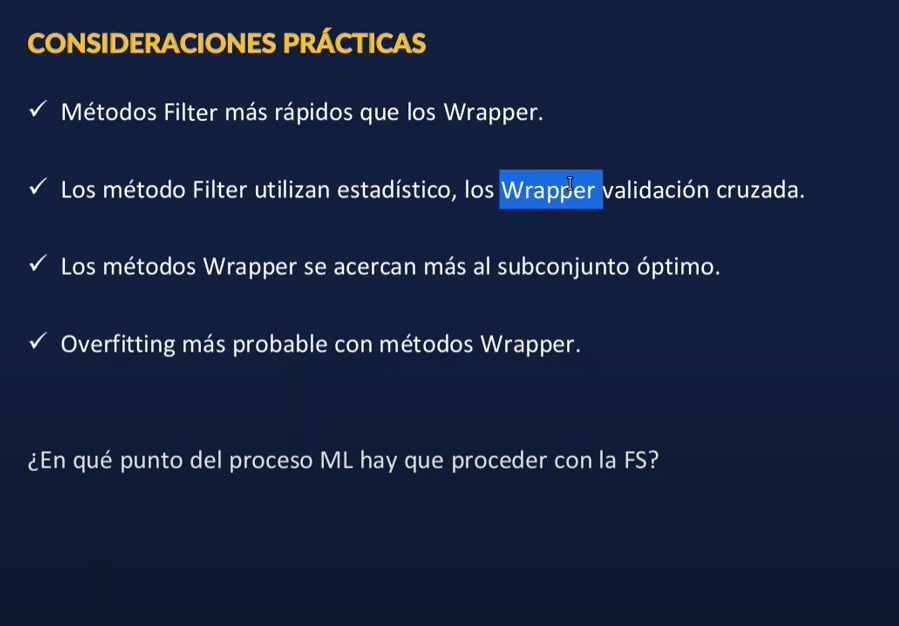

In [69]:
from IPython.display import Image
Image(filename='img/4.PNG')

<h2><span style="color:Red">3. PCA Analisis de componentes principales</span></h2>

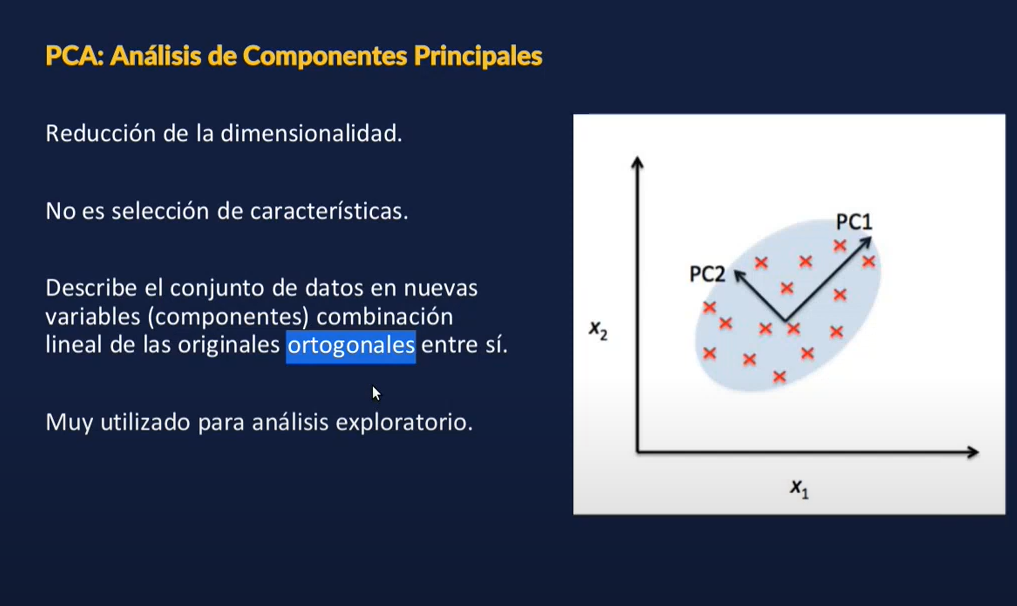

In [71]:
from IPython.display import Image
Image(filename='img/5.PNG')

**Ortogonales** significa que los componentes principales son completamente independeintes entre si


HAcen una combinacion lineal entre las variables de entrada

Se describen las variables originales con menos variables que en número son **menos**

Es decir que estamos reduciendo la dimensionalidad del conjunto

Esto es <h4><span style="color:red">muy utilizado</h4> en <h4><span style="color:blue">Analisisi exploratorio de datos</span></h4></span>

Tengo un conjunto de datos con 2 variables y una independiente.

Si puedo hacer una representacion grafica porque son 2 dimensiones

Pero si tengo 6 variables no podria representarlas todas al mismo tiempo 

Por eso se utiliza el <span style="color:blue">Analisisi exploratorio de componentes principales</span>

PAra poder resentar todas esas variables 

Esto es <span style="color:red">muy utilizado</h4></span> porque representa un comparacion lineal de todas la s variables.

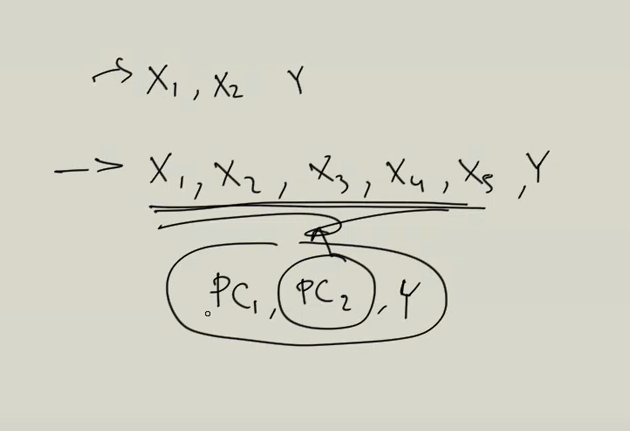

In [72]:
from IPython.display import Image
Image(filename='img/6.PNG')

Al reducir la dimensionalidad hay una **perdida de informacion**

Pero vamos a poder cuantificar de cuanto se trata

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

In [74]:
iris = datasets.load_iris()

In [75]:
X = iris.data
y = iris.target


In [76]:
target_names = iris.target_names

Aqui indico que lo que quiero en resumir todas las variables en **2**

Entonces creo un nuevo objeto  **PCA**

In [79]:
pca = PCA(n_components=2)

Alimento el objeto con las variabels de entrada

Y el resultado y ame queda con la **variables** transformadas.

In [88]:
X_r = pca.fit(X).transform(X)

Una vezs entrenado ese objeto, me cuantifica que catidad de informacion cada uno de los DOS componenetes principales que he selecionado

Esa cuantificacion la podemos ver con el atributo <span style="color:blue"> explained_variance_ratio_</span>

Los resultados me dices que con el primer componente principal estoy esplicando el **92%** de topdas las variables

COn el segundo componenete principal explico casi el **5%** de los datos contenidos en todas la variables



In [83]:
print('Varianza explicada (primers 2 componentes): %s'
        % str(pca.explained_variance_ratio_))

Varianza explicada (primers 2 componentes): [0.92461872 0.05306648]


Pero tambien me dice como obtener esoso resultados

Y me dice que para obtener estos resultado tengo que multiplicar cada una de las variables por esos datos

Recordemos que el Iris data set tienen **4** variables , por eso dme da 4 datos.

In [90]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Si yo aplico esto sobre el nuevo dataset tendre un dataset con **DOS** variables de entrada y **UNA** de salida.


Entonces lo que voy a ahacer es colorear cada punto de acurdo a la clase a la que pertenece

Pero si lo puedo hacer porque lo tengo en 2 dimensiones.

In [91]:
plt.figure()
colors = ['indigo','blue','yellow']

<Figure size 640x480 with 0 Axes>

In [86]:
lw = 2

Text(0.5, 1.0, 'PCA del DataSet IRIS')

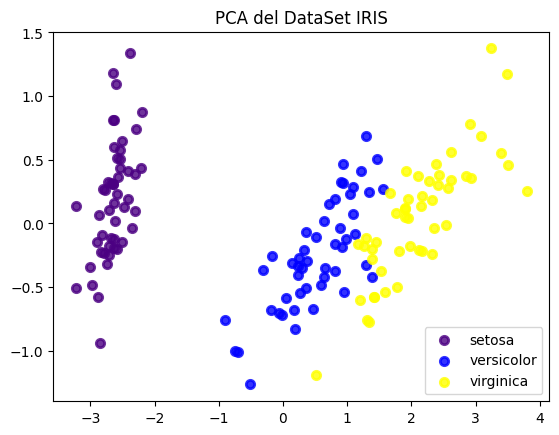

In [87]:
for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_r[y==i, 0],X_r[y == i, 1], color=color, alpha=.8, lw = lw, label=target_name)

plt.legend(loc='best', scatterpoints= 1)
plt.title('PCA del DataSet IRIS')